## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

In [95]:
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Data Manipulation with pandas](https://www.datacamp.com/courses/data-manipulation-with-pandas)
* [Introduction to Data Visualization with Seaborn](https://www.datacamp.com/courses/introduction-to-data-visualization-with-seaborn)
* [Introduction to Statistics in Python](https://www.datacamp.com/courses/introduction-to-statistics-in-python)

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [96]:
# Importing the pandas module
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import numpy as np

# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')

# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Lets view the information on the data

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [98]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [99]:
df.fillna(df.mean(), inplace=True)
df["ingredients"] = df["ingredients"].fillna(0)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2530 non-null   float64
 8   ingredients       2530 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [101]:
df.duplicated().sum()

0

In [102]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.897874,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


## Data Visualization

<AxesSubplot:>

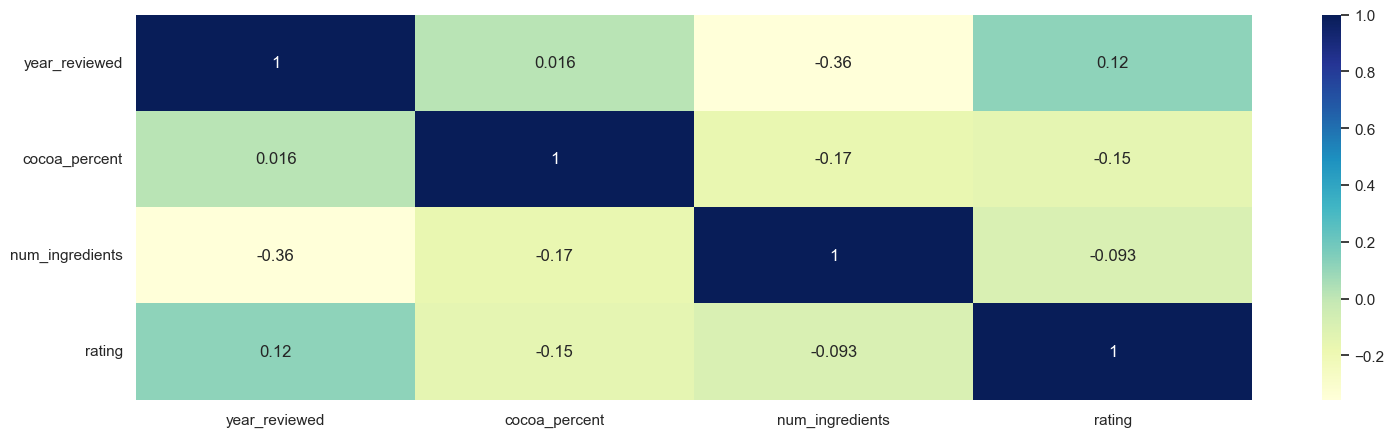

In [103]:
sns.heatmap(df[['year_reviewed', 'cocoa_percent', 'num_ingredients','rating']].corr(), annot=True, cmap='YlGnBu')

### Findings: There are no correlation coefficient or relationship between the varables analyzed on the heat map above.

## 1. What is the average ratings by country of bean origin

In [104]:
bean_origin_byrating = df.groupby('bean_origin').rating.mean().reset_index().sort_values(by = 'rating', ascending = False)
bean_origin_byrating

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


<AxesSubplot:xlabel='bean_origin', ylabel='rating'>

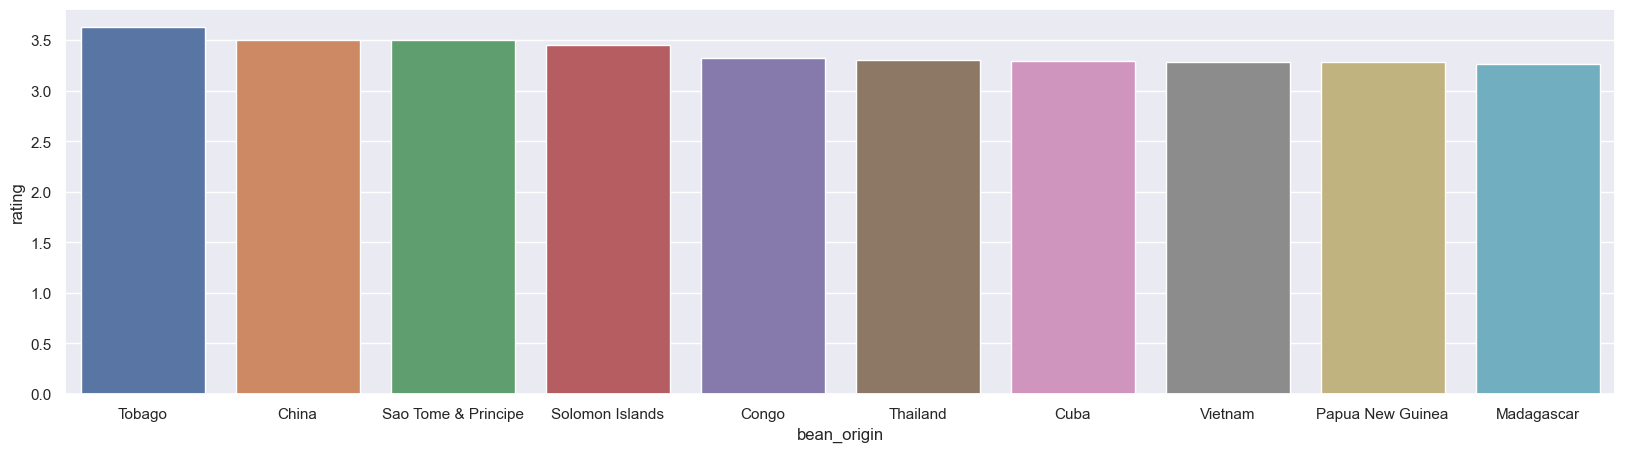

In [105]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x="bean_origin",y="rating",data=bean_origin_byrating[0:10])

### Observation: The bean origin with the highest rating from the analsis and plot above are Tobago, China and Sao Toma & Principe respectively and lowest being pricipe, Martinique and Puerto Rico. Puerto Rico being the lowest.

## 2. How many bars are reviewed for each of those countries?

In [106]:
df_bar_name = df.groupby('bean_origin').agg({'bar_name':'count'}).sort_values(by='bar_name', ascending=False)
df_bar_name

,bar_name
bean_origin,
Venezuela,253
Peru,244
Dominican Republic,226
Ecuador,219
Madagascar,177
...,...
Suriname,1
Sumatra,1
Sulawesi,1


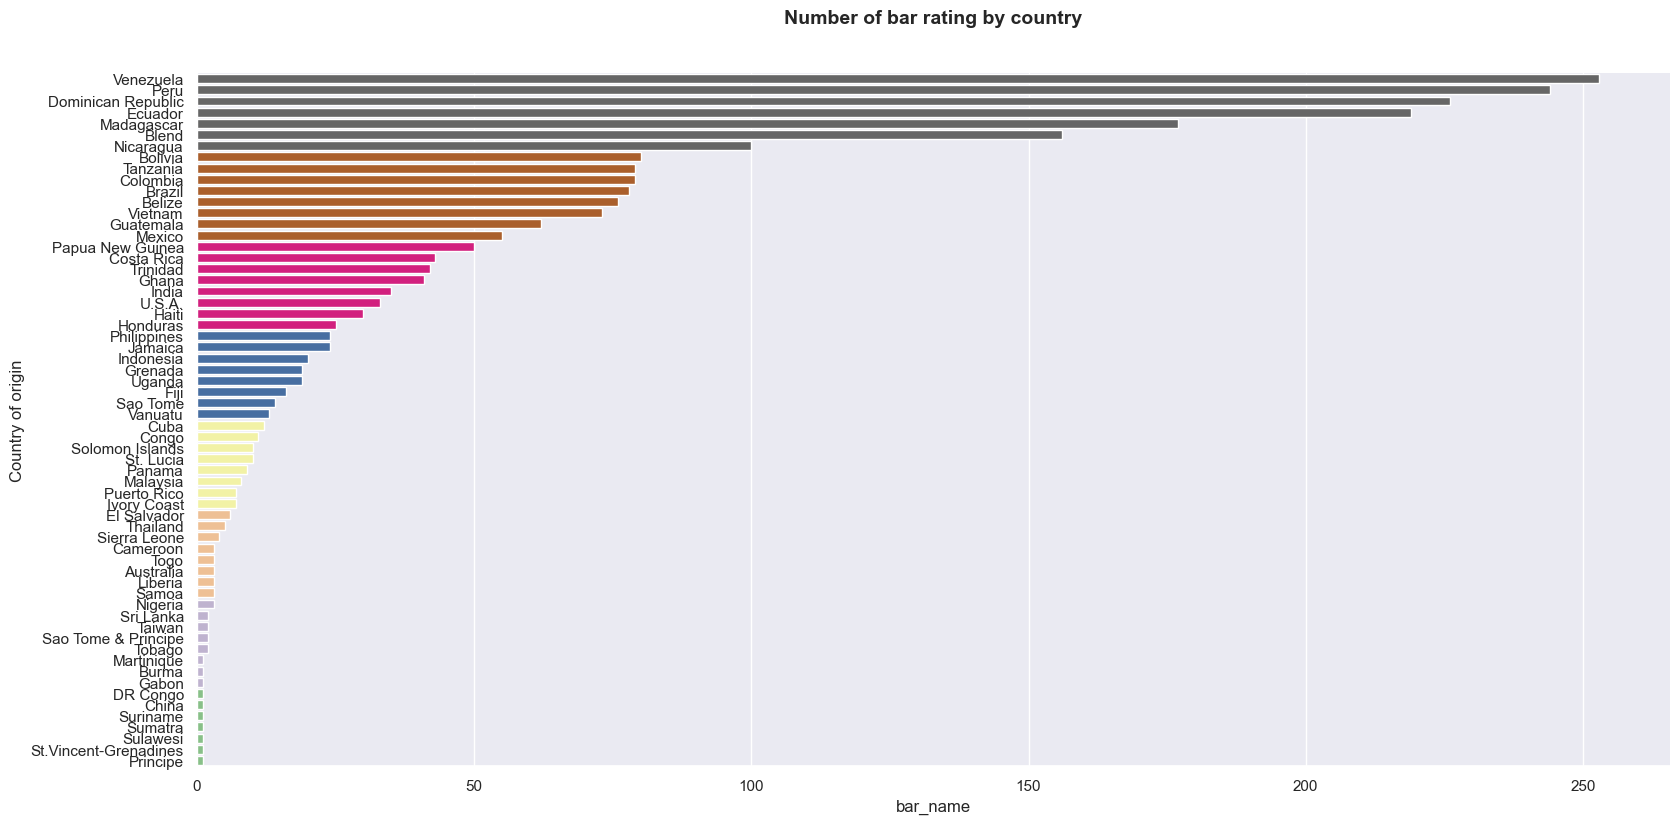

In [107]:
df_bar_name = df.groupby('bean_origin').agg({'bar_name':'count'}).sort_values(by='bar_name', ascending=False).reset_index()

fig = plt.figure(figsize=(19, 9))
sns.barplot(data=df_bar_name, 
            y='bean_origin', 
            x='bar_name', 
            palette='Accent_r')
sns.despine()
plt.title('Number of bar rating by country\n\n', 
          fontdict={'fontsize':14, 
                    'fontweight':'bold'})
plt.ylabel('Country of origin')
plt.show()

In [108]:
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


## 3. Chocolate bars reviewed each year

In [109]:
choco_bar_review = df.groupby("year_reviewed").bar_name.count().reset_index().sort_values("bar_name", ascending = False)
choco_bar_review

,year_reviewed,bar_name
9,2015,284
8,2014,247
12,2018,228
10,2016,217
6,2012,194
13,2019,193
7,2013,183
15,2021,175
5,2011,163
3,2009,123


<AxesSubplot:xlabel='year_reviewed', ylabel='bar_name'>

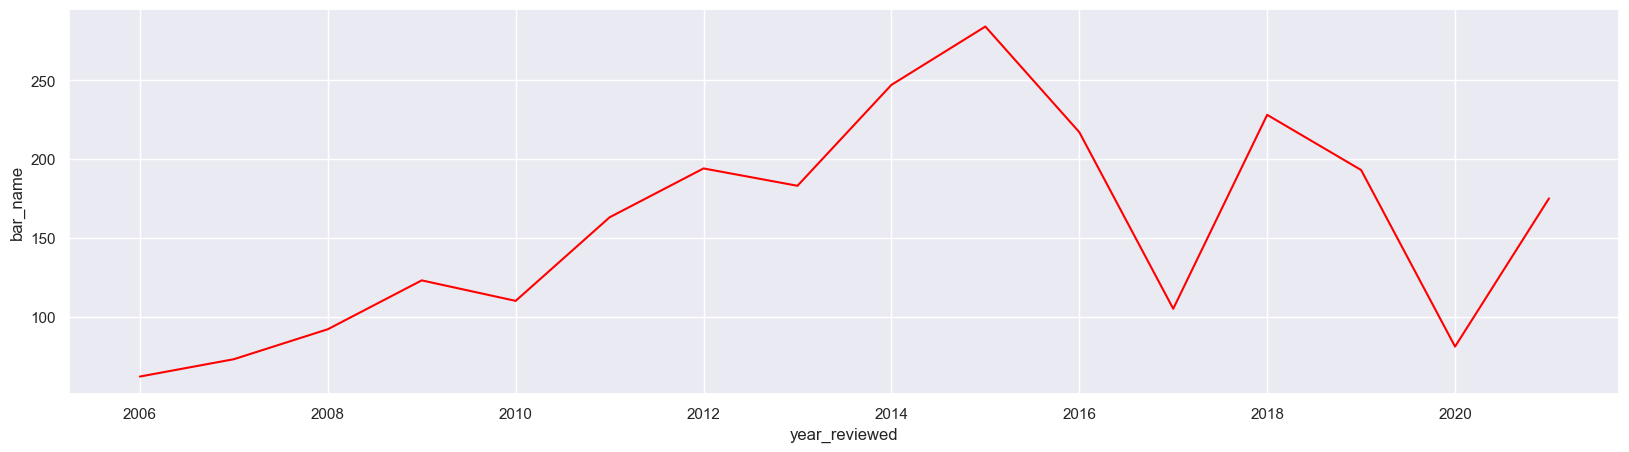

In [110]:
sns.lineplot(x="year_reviewed",y="bar_name",data=choco_bar_review, color = "red")

## 3b. Was the review affected by the manufacturer? Which manufacturer have the highest ratings?

In [111]:
manuf_rating = df.groupby("manufacturer").rating.mean().reset_index().sort_values("rating", ascending=False)
manuf_rating

,manufacturer,rating
528,Tobago Estate (Pralus),4.000000
255,Heirloom Cacao Preservation (Zokoko),3.875000
403,Ocelot,3.875000
348,Matale,3.812500
425,Patric,3.791667
...,...,...
328,Majani,2.000000
315,Love Bar,2.000000
91,Callebaut,1.875000
323,Machu Picchu Trading Co.,1.875000


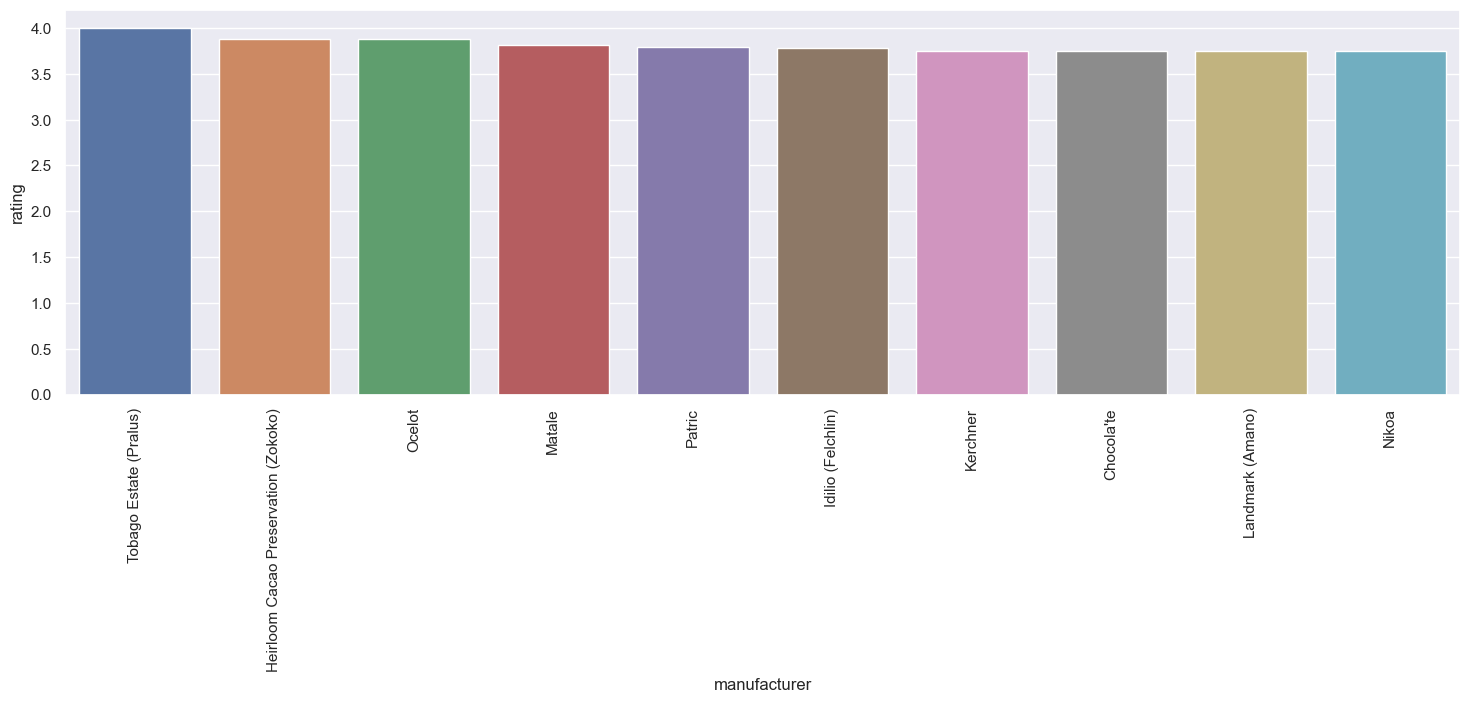

In [112]:
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(x="manufacturer",y="rating",data=manuf_rating[0:10])
plt.xticks(rotation = 90)
plt.show()

### Observation: Tobago estate manufacturer has the highest average rating among the manufacturer. You would recollect that that name Tobago was mentioned in our analysis on bean_origin and rating to be the highest also. Therefore there may be a relationship between the bean origin and manufacturer.

## 4. Is the bean origin an indicator of quality?

In [113]:
bean_indicator_quality = df.groupby(["bean_origin"]).describe()["rating"]
# Number of origins
num_origin = len(bean_indicator_quality)
recommended_table = bean_indicator_quality[bean_indicator_quality["mean"] >= 3.0].reset_index()
display(recommended_table.head())
n_recommended = len(recommended_table)
indicatorPercent = 100 * (n_recommended / num_origin)

,bean_origin,count,mean,std,min,25%,50%,75%,max
0,Australia,3.0,3.250000,0.500000,2.75,3.00,3.25,3.5,3.75
1,Belize,76.0,3.233553,0.324899,2.50,3.00,3.25,3.5,4.00
2,Blend,156.0,3.038462,0.637633,1.00,2.75,3.00,3.5,4.00
3,Bolivia,80.0,3.181250,0.435699,2.00,3.00,3.25,3.5,4.00
4,Brazil,78.0,3.262821,0.416575,1.75,3.00,3.25,3.5,4.00


In [114]:
print("Indicator:", "{:.2f}".format(indicatorPercent), "%")


Indicator: 85.48 %


Using values of rating vs. bean origin, the above plot revealed that bean origin is an indicator of quality with 85.48%.

In [115]:
df.head(2)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50


## 5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

In [116]:
df[df['rating'] >= 3.5].cocoa_percent.mean()

71.10849539406345

## 6. Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [117]:
with_Lecithin = df[df["ingredients"].str.contains("L")==True]
with_Lecithin['rating'].describe()

count    493.000000
mean       3.150609
std        0.486097
min        1.000000
25%        2.750000
50%        3.250000
75%        3.500000
max        4.000000
Name: rating, dtype: float64

In [118]:
without_lecithin = df[df["ingredients"].str.contains("L")==False]
without_lecithin['rating'].describe()

count    1950.000000
mean        3.225128
std         0.411276
min         1.500000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

### Observation: The count for chocolate bars with Lecithin is 493 and the average rating is 3.15 while the number of chocolate bars without Lecithin is 1,950 and the average rating is 3.23.

### 7. Summarize your findings

- The bean origin is an indicator of a good quality of a chocolate, it is advised that more beans should be gotten from Tobago, China, Sao Tome & Principle, Solomon Islands and Congo. 


- Chocolate bars with Lecithin has the lowest rating, this means that more bars without Lecithin should be manufactured. 

- The best suppliers of the bars can be gotten from countries with best ratings and best rewiews. 
